In [11]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import os
import sys

In [12]:
os.path.join(sys.path[0], file)

'/Users/noahhood/Desktop/Xenon/SLArPAAS_LightSystem/FirstSLArPAAS_SiPMChannel_ColdTest/LargePulses.zip'

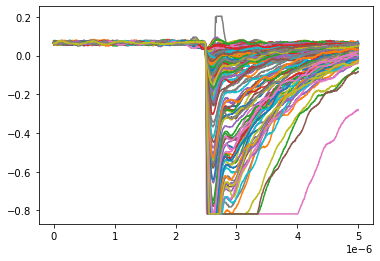

In [13]:
fig, ax = plt.subplots()
for file in os.listdir('./Withhighertrigger_2pf_2p7kohm_noradiosource/'):
    if file.endswith('.csv'):
        data = np.loadtxt(os.path.join('./Withhighertrigger_2pf_2p7kohm_noradiosource/', file), delimiter=',', skiprows=3)
        ax.plot(data[:,0], data[:,1], label=file)

In [22]:
data = []
for file in os.listdir('./Withhighertrigger_2pf_2p7kohm_noradiosource/'):
    if file.endswith('.csv'):
        temp = np.loadtxt(os.path.join('./Withhighertrigger_2pf_2p7kohm_noradiosource/', file), delimiter=',', skiprows=3)
        data.append(temp)
data = np.array(data)
print(data.shape)

(359, 1000, 2)


In [23]:
baselines = []
len = data[0, :, 0].size
for i, dat in enumerate(data):
    baselines.append(np.average(dat[:int(len*3/8), 1]))
    data[i, :, 1] = data[i, :, 1] - baselines[i]
    data[i, :, 1] = data[i, :, 1] * -1

0.06530082684791086

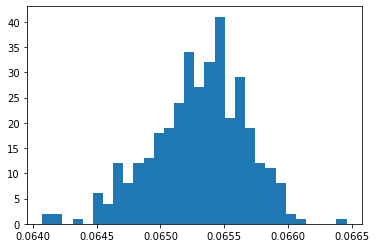

In [24]:
fig, ax = plt.subplots()
ax.hist(baselines, bins=30)
np.average(baselines)

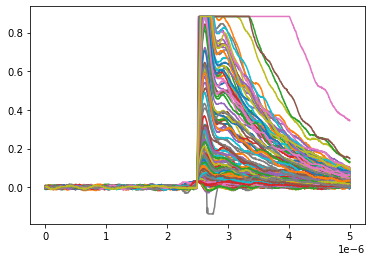

In [25]:
fig, ax = plt.subplots()
for i in data:
    ax.plot(i[:,0], i[:,1])

In [30]:
saturated = []
for i, dat in enumerate(data):
    if np.where(dat[:, 1] == max(dat[:, 1]))[0].size > 2:
        saturated.append(True)
    else:
        saturated.append(False)

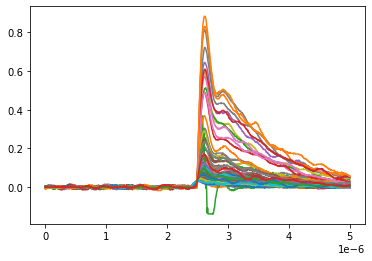

In [31]:
fig, ax = plt.subplots()
for i in data[~np.array(saturated)]:
    ax.plot(i[:,0], i[:,1])

In [32]:
X = []
for i, dat in enumerate(data):
# for i, dat in enumerate(data[~np.array(saturated)]):
    X.append(np.fft.fft(dat[:, 1]))

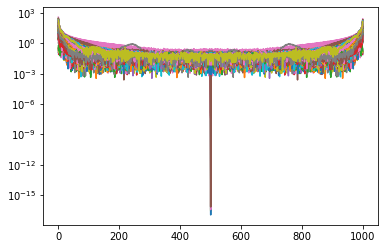

In [33]:
fig, ax = plt.subplots()
for i in X:
    ax.plot(np.abs(i))
ax.set_yscale('log')

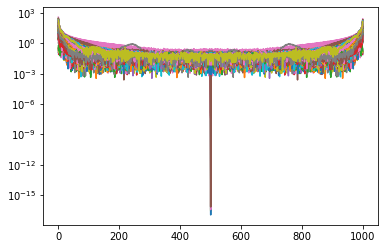

In [34]:
fig, ax = plt.subplots()
for i in X:
    ax.plot(np.abs(i))
ax.set_yscale('log')

In [42]:
area = []
height = []
for i, dat in enumerate(data):
    area.append(np.trapz(dat[int(7*len/16):, 1], dat[int(7*len/16):, 0]))
    height.append(max(dat[:, 1]))

(array([[12.,  1.,  0., ...,  0.,  0.,  0.],
        [46., 36., 10., ...,  0.,  0.,  0.],
        [ 9., 17., 24., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.]]),
 array([-1.47535422e-09,  1.73803799e-08,  3.62361140e-08,  5.50918482e-08,
         7.39475823e-08,  9.28033164e-08,  1.11659051e-07,  1.30514785e-07,
         1.49370519e-07,  1.68226253e-07,  1.87081987e-07,  2.05937721e-07,
         2.24793455e-07,  2.43649189e-07,  2.62504924e-07,  2.81360658e-07,
         3.00216392e-07,  3.19072126e-07,  3.37927860e-07,  3.56783594e-07,
         3.75639328e-07,  3.94495062e-07,  4.13350797e-07,  4.32206531e-07,
         4.51062265e-07,  4.69917999e-07,  4.88773733e-07,  5.07629467e-07,
         5.26485201e-07,  5.45340935e-07,  5.64196670e-07,  5.83052404e-07,
         6.01908138e-07,  6.20763872e-07,  6.39619606e-07,  6.58475340e-07,
         6.77331074e-07,  6.961

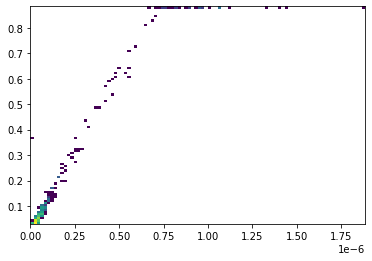

In [43]:
fig, ax = plt.subplots()
ax.hist2d(area, height,  bins=100, norm = mpl.colors.LogNorm(), cmap='viridis')

(array([ 2.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  3.,
         1.,  1.,  1.,  1.,  2.,  2.,  3.,  2.,  2.,  2.,  6.,  7.,  5.,
        11.,  6.,  5.,  6.,  5.,  7.,  5.,  8.,  4., 10.,  9.,  3.,  8.,
         4.,  5.,  4.,  4.,  5.,  4.,  3.,  6.,  4.,  4.,  7.,  4.,  0.,
         5.,  1.,  2.,  1.,  3.,  2.,  2.,  4.,  5.,  5.,  4.,  3.,  3.,
         2.,  3.,  2.,  3.,  2.,  1.,  0.,  2.,  2.,  1.,  0.,  0.,  3.,
         1.,  0.,  4.,  0.,  1.,  3.,  0.,  1.,  0.,  4.,  1.,  1.,  0.,
         0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.]),
 array([0.00000000e+00, 1.01010101e-09, 2.02020202e-09, 3.03030303e-09,
        4.04040404e-09, 5.05050505e-09, 6.06060606e-09, 7.07070707e-09,
        8.08080808e-09, 9.09090909e-09, 1.01010101e-08, 1.11111111e-08,
        1.21212121e-08, 1.31313131e-08, 1.41414141e-08, 1.51515152e-08,
        1.61616162e-08, 1.71717172e-08, 1.81818182e-08, 1.91919192e-08,
        2.02020202e-08, 2.12121212e-08, 2.22222222e-08, 2.32323232e-08,
       

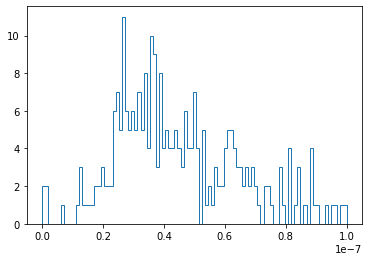

In [44]:
fig, ax = plt.subplots()
ax.hist(area, bins=np.linspace(0, 0.1e-6, 100), histtype='step')

(array([67., 54., 35., 27., 26., 14.,  9., 15.,  6.,  8.,  6.,  5.,  4.,
         3.,  3.,  0.,  4.,  0.,  1.,  2.,  0.,  3.,  0.,  1.,  1.,  1.,
         1.,  1.,  1.,  0.,  1.,  1.,  1.,  2.,  3.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         1.,  1.,  2.,  0.,  2.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  1.,  0.,  0.,  0., 31.]),
 array([0.03000603, 0.03855105, 0.04709607, 0.05564109, 0.06418611,
        0.07273113, 0.08127615, 0.08982117, 0.09836619, 0.10691121,
        0.11545623, 0.12400125, 0.13254627, 0.14109129, 0.14963631,
        0.15818133, 0.16672635, 0.17527137, 0.18381639, 0.19236141,
        0.20090643, 0.20945145, 0.21799647, 0.22654149, 0.23508651,
        0.24363154, 0.25217656, 0.26072158, 0.2692666 , 0.27781162,
        0.28635664, 0.2949

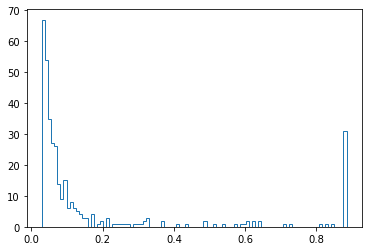

In [45]:
fig, ax = plt.subplots()
ax.hist(height, bins=100, histtype='step')